In [25]:
%reload_ext autoreload
%autoreload 2

import cv2
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

from os import path
from utilities.patches import *


from jupyterthemes import jtplot
jtplot.reset()

plt.style.use(['science', 'ieee'])
# matplotlib.rcParams['figure.figsize'] = (5,4)
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""

def figsave(fig, out_path, ax=None):
    if ax is not None:
        ax.view_init(elev=20, azim=125)

        ax.tick_params(axis = 'both', which = 'major', labelsize = 4, pad=0)
        ax.tick_params(axis = 'both', which = 'minor', labelsize = 4, pad=0)
#     plt.show()
    fig.savefig(out_path, bbox_inches='tight', transparent=True)

## Height maps pictures

In [2]:
def hmshow(hm, save_path=None):
    fig = plt.figure(dpi=800)
    plt.tight_layout()
    sns.heatmap(hm, cmap=plt.cm.viridis, vmin=0, vmax=1)
#     plt.axis('off')
    plt.show()
    if save_path is not None: fig.savefig(save_path, bbox_inches='tight')
    return fig

def hmread(path):
    hm = cv2.imread(path)
    hm = cv2.cvtColor(hm, cv2.COLOR_BGR2GRAY)
    return hm

def hm_name_from_path(hm):
    return path.basename(hm)

In [22]:
out_dir = '/home/francesco/Documents/Master-Thesis/papers/Thesis/img/hm/'

In [ ]:
hms = glob.glob('./maps/train/*.png')

In [ ]:
name2path = {hm_name_from_path(hm) : hm for hm in hms}

In [ ]:
hmshow(hmread(hms[0]) / 255, '{}/{}'.format(out_dir, hm_name_from_path(hms[0])))
for hm in hms:
    hmshow(hmread(hm) / 255, '{}/{}'.format(out_dir, hm_name_from_path(hm)))

In [ ]:
out_dir = '/home/francesco/Documents/Master-Thesis/papers/Thesis/img/hm3d/'

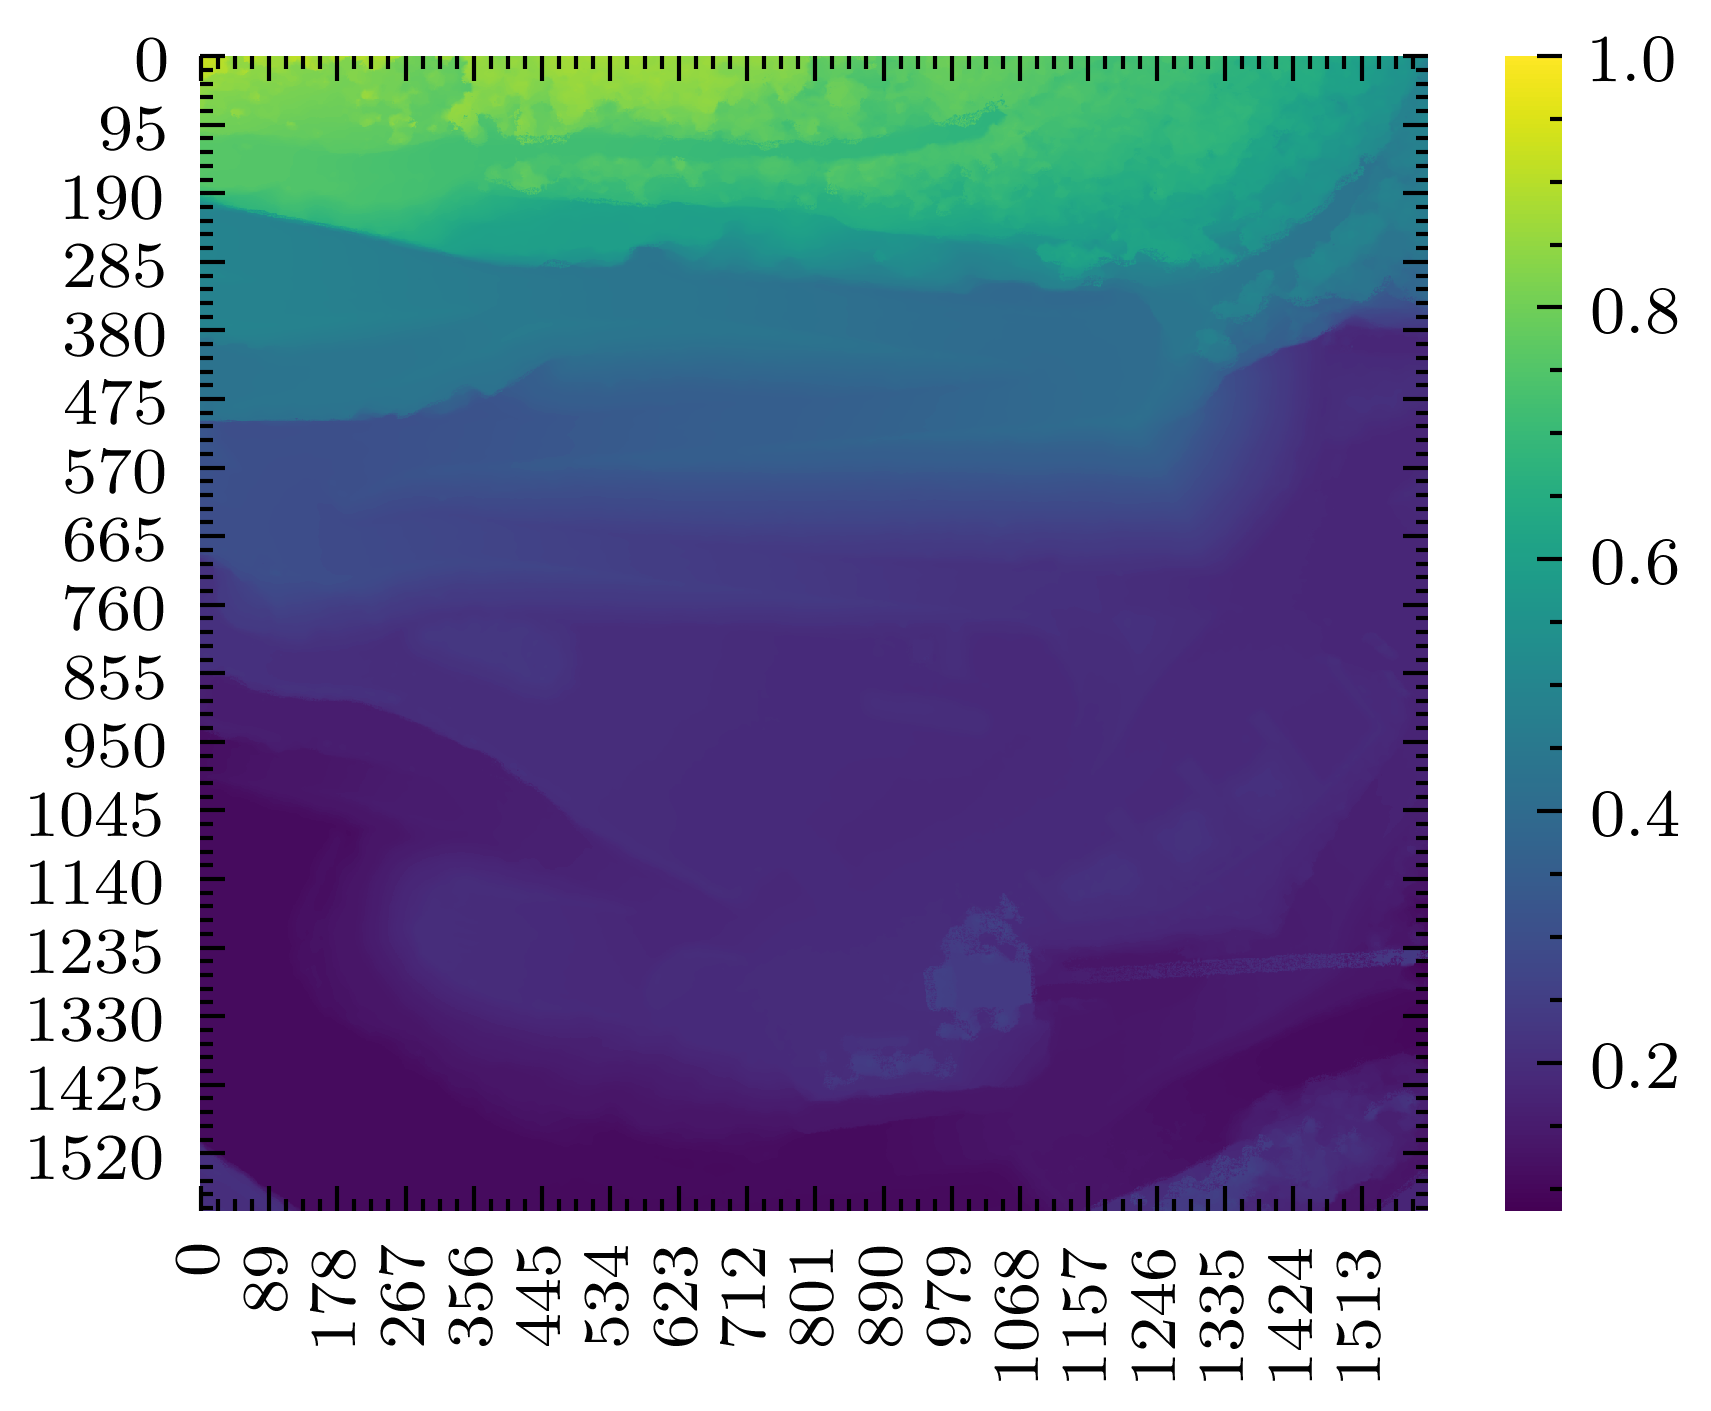

In [26]:
# matplotlib.rcParams['figure.figsize'] = (5,4)
# matplotlib.rcParams['font.size'] = 6

for hm in hms:
    fig, ax = Patch.from_hm(hmread(hm) / 255).plot3d(title='', colorbar=True, dpi=800, rstride=1, cstride=1)
#     ax.set_aspect(0.5)
#     ax.set_zlim(0, 1)
    ax.view_init(elev=40, azim=-45)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 4, pad=0)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 4, pad=0)
    plt.show()

    fig.savefig('{}/{}'.format(out_dir, hm_name_from_path(hm)),  bbox_inches = "tight", transparent=True)
    

In [ ]:
??matplotlib.axes.Axes.tick_params

In [ ]:
hm_slope = './maps/train/slope_rocks1.png'

In [ ]:
height_factor = 3
fig, ax = Patch.from_hm((hmread(hm) / 255) * height_factor).plot3d(title='', dpi=800,  colorbar=False)
ax.tick_params(axis = 'both', which = 'major', labelsize = 4, pad=0)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 4, pad=0)
plt.show()
fig.savefig('{}/{}-{}'.format(out_dir, height_factor, hm_name_from_path(hm)), bbox_inches='tight', transparent=True)

In [ ]:
hm = './maps/test/querry-big-10.png'


In [ ]:
hm = './maps/test/querry-big-10.png'

height_factor = 3
fig, ax = Patch.from_hm((hmread(hm) / 255)).plot3d(title='', dpi=800,  rstride=20, cstride=20, colorbar=False)
ax.set_aspect(0.5)
ax.set_zlim(0, 1)
ax.view_init(elev=40, azim=140)
ax.tick_params(axis = 'both', which = 'major', labelsize = 4, pad=2)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 4, pad=2)
plt.show()
fig.savefig('{}/{}'.format(out_dir, hm_name_from_path(hm)), bbox_inches='tight', transparent=True)

## Patch pictures
### store the patch and map position for some simulations

In [ ]:
# %matplotlib notebook
matplotlib.rcParams['figure.figsize'] = (8,8)
fig = plt.figure()
height_factor = 3
fig, ax = Patch.from_hm((hmread(hm) / 255)).plot3d(title='', dpi=800,  colorbar=False)
ax.view_init(elev=20, azim=125)

ax.tick_params(axis = 'both', which = 'major', labelsize = 4, pad=0)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 4, pad=0)
plt.show()
fig.savefig('{}/{}'.format(out_dir, hm_name_from_path(hm)), bbox_inches='tight', transparent=True)

In [ ]:
from utilities.visualisation import *
from utilities.postprocessing.utils import KrockPatchExtractStrategy

### from the wall map

In [ ]:
df_base_dir = '/media/francesco/saetta/krock-dataset/train/csvs_patches/'
meta = pd.read_csv('/media/francesco/saetta/krock-dataset/train/bags/meta.csv')
meta = meta[meta['map'] == 'bars1']
hm_dir = '/media/francesco/saetta/krock-dataset/train/patches/'

In [ ]:
df = pd.read_csv('{}/{}.csv'.format(df_base_dir, meta['filename'].iloc[0]))
# for some reason map name is missing
df['map_name'] = 'bars1'
hm = hmread('./maps/train/bars1.png')

In [ ]:
df_vis = PatchesAndDataframeVisualization(df,hm, patch_extractor=KrockPatchExtractStrategy)

In [ ]:
%matplotlib notebook
df_vis.show_patches_on_the_map(df=df_vis.df[0:4], compress=False)

# Data aug

In [ ]:
out_dir = '/home/francesco/Documents/Master-Thesis/papers/Thesis/img/data-aug/'

In [ ]:
from estimators.data.transformations import *

In [ ]:
from utilities.patches import *

class SquareInTheMiddlePatch(Patch):
    def make(self, size=4, *args, **kwargs):
#         here we can access the .hm filled with zeros
        self.hm[self.shape[0] // 2 - size : self.shape[0] // 2 + size, self.shape[1] // 2 - size: self.shape[0] // 2 + size] = 1
        return self.hm

## Center patch


In [ ]:
center_p = SquareInTheMiddlePatch((100,100))(size=25)


In [ ]:
center_p = SquareInTheMiddlePatch((100,100))(size=25)

fig, ax = center_p.plot3d(rstride=1, cstride=1)

figsave(fig, out_dir +'/3d/square-middle.png', ax)

fig = center_p.plot2d()
figsave(fig, out_dir +'/2d/square-middle.png', None)


In [ ]:
transform = CenterAndScalePatch()

center_p_tr = transform(center_p.hm)
center_p_tr = Patch.from_hm(center_p_tr)

fig, ax = center_p_tr.plot3d(rstride=1, cstride=1)

figsave(fig, out_dir +'/3d/square-middle-center.png', ax)

fig = center_p_tr.plot2d()
figsave(fig, out_dir +'/2d/square-middle-center.png', None)
# plt.show()

## Data-aug

### Simplex noise

In [ ]:
random_simplex_noise = RandomSimplexNoise((100,100), n=5)

In [ ]:
flat_path = Patch((100,100))

In [ ]:
center_p_simplex = Patch.from_hm(im2simplex(flat_path.hm.copy(), feature_size=5, scale=8))

In [ ]:
for i in range(1,5):
    center_p_simplex = Patch.from_hm(im2simplex(flat_path.hm.copy(), feature_size=10 * (i + 1), scale=8))
#     fig, ax = center_p_simplex.plot3d(rstride=1, cstride=1)
#     figsave(fig out_dir + '/3d/simplex{}.png'.format(i), ax)
    fig, ax = center_p_simplex.plot3d()
#     fig = plt.gcf()
    figsave(fig, out_dir + '/3d/simplex{}.png'.format(i), ax)


### Dropout

In [ ]:
center_p.plot2d()

In [ ]:
# wall_p = WallPatch((100,100), size=8)()
wall_p = center_p
wall_p_dp = Patch.from_hm(iaa.Dropout(p=(0.05, 0.1)).augment_image(wall_p.hm))

fig = wall_p_dp.plot2d()
figsave(fig, out_dir + '/2d/center-dropout.png')

### Croase Dropout

In [ ]:
# wall_p = WallPatch((100,100), size=8)()
wall_p_dp = Patch.from_hm(iaa.CoarseDropout((0.02, 0.1),size_percent=(0.6, 0.8)).augment_image(wall_p.hm))

fig = wall_p_dp.plot2d()
plt.show()
figsave(fig, out_dir + '/2d/center-coarse-dropout.png')

In [ ]:
x = Patch.from_hm(im2simplex(center_p.hm.copy(), feature_size=25, scale=8))
fig = x.plot2d()
plt.show()
figsave(fig, out_dir + '/2d/center-simplex.png')

In [ ]:
x = RampPatch((100,100))()

fig = x.plot2d()
figsave(fig, out_dir + '/2d/ramp.png')

x = iaa.Dropout(p=(0.05, 0.1)).augment_image(x.hm)
x = iaa.CoarseDropout((0.02, 0.1),size_percent=(0.6, 0.8)).augment_image(x)
x = im2simplex(x.copy(), scale=8)

x = Patch.from_hm(x)

fig = x.plot2d()
# x.plot3d()

figsave(fig, out_dir + '/2d/ramp-aug.png')

## Spawn

In [4]:
out_dir = '/home/francesco/Documents/Master-Thesis/papers/Thesis/img/3/spawn/'

In [5]:
from simulation.env.spawn import FlatGroundSpawnStrategy

In [11]:
spawn_strat = FlatGroundSpawnStrategy('./maps/train/bars1.png')

/home/francesco/.local/lib/python3.6/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f64a452c9e8> has a label of '_line0' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


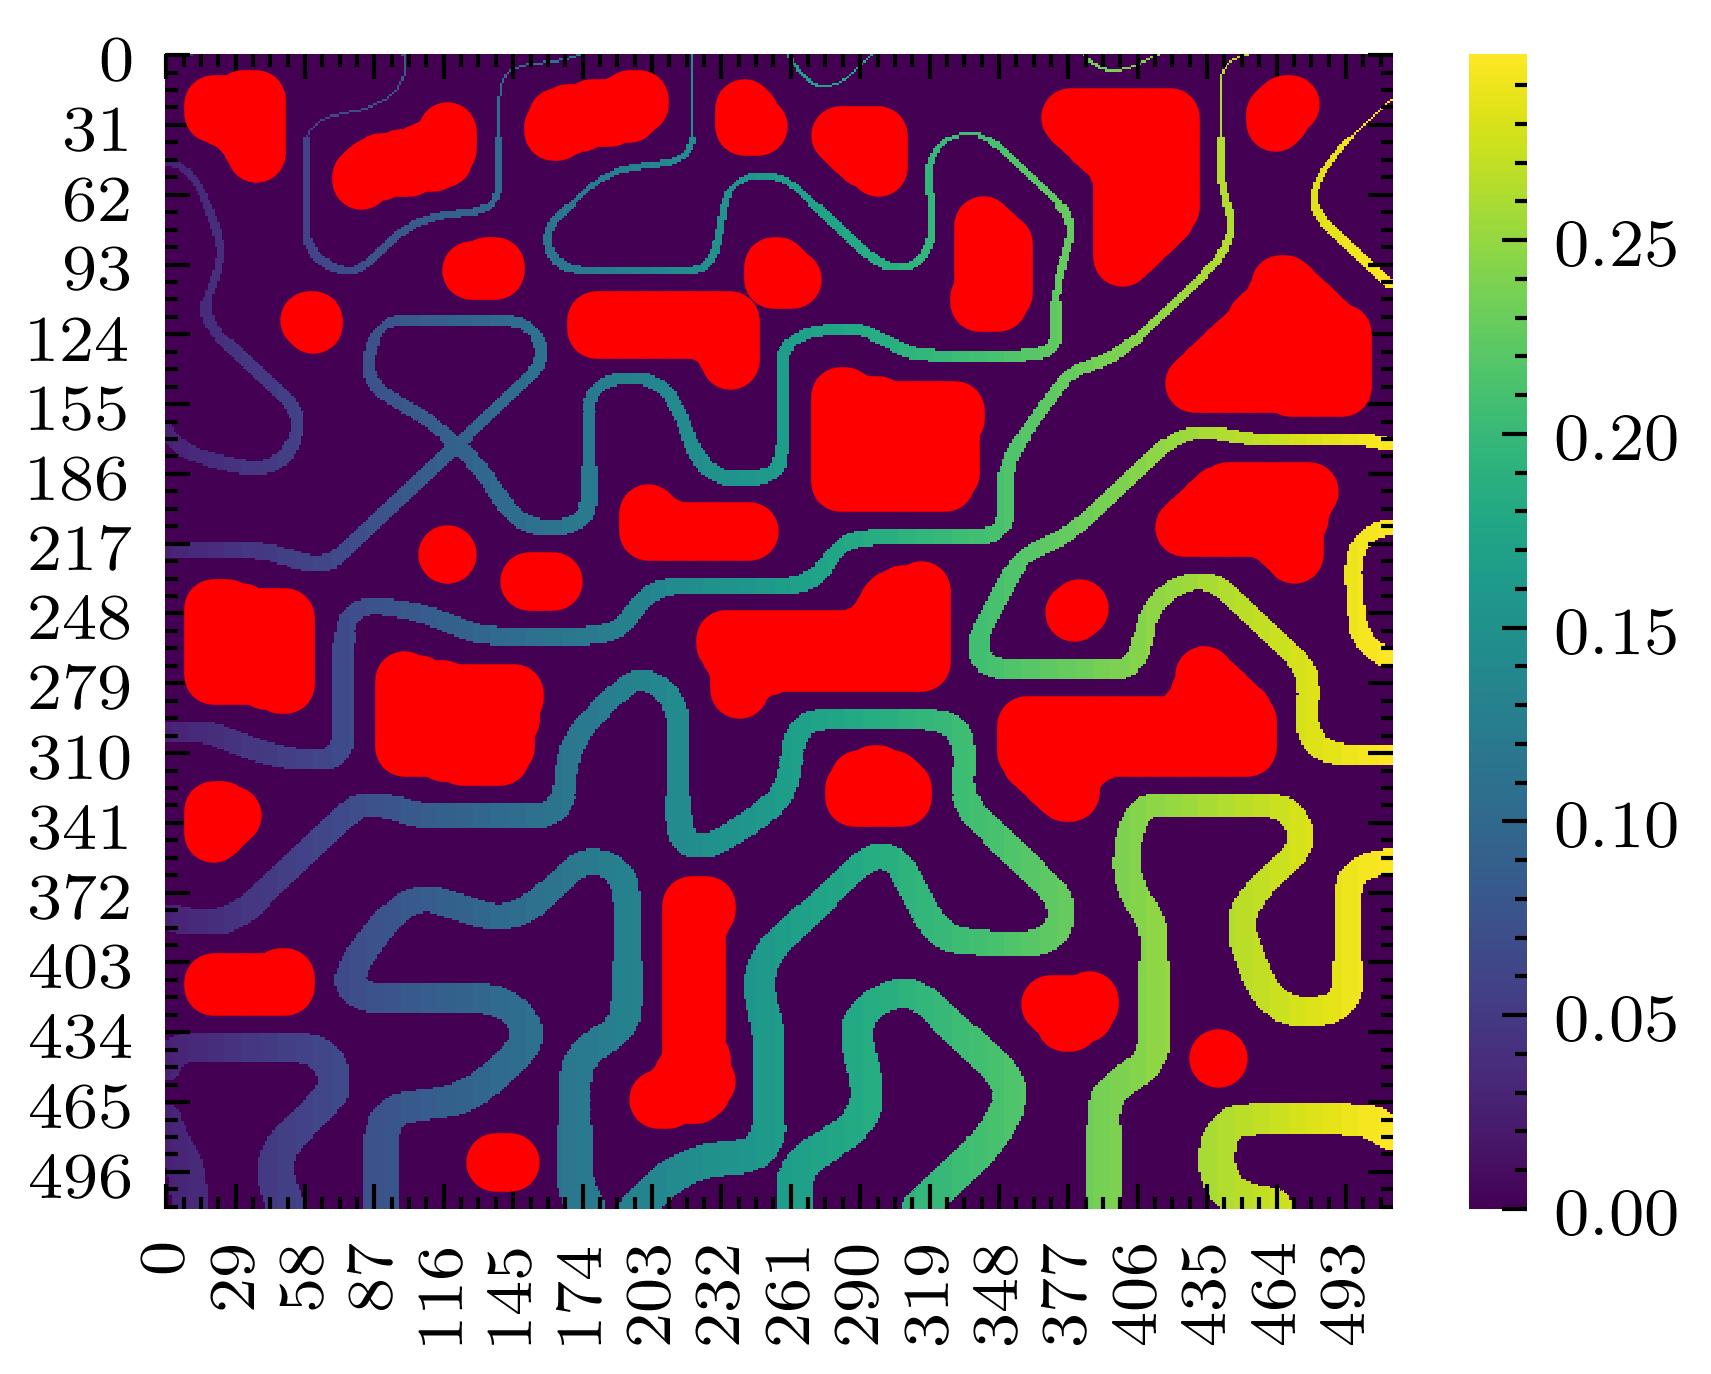

In [18]:
flat_pos = spawn_strat.find_spawn_points(40)
fig = spawn_strat.show_spawn_pos(flat_pos)
figsave(fig, out_dir + '/flat-spawn-10.png')

/home/francesco/.local/lib/python3.6/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f64a4403dd8> has a label of '_line0' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


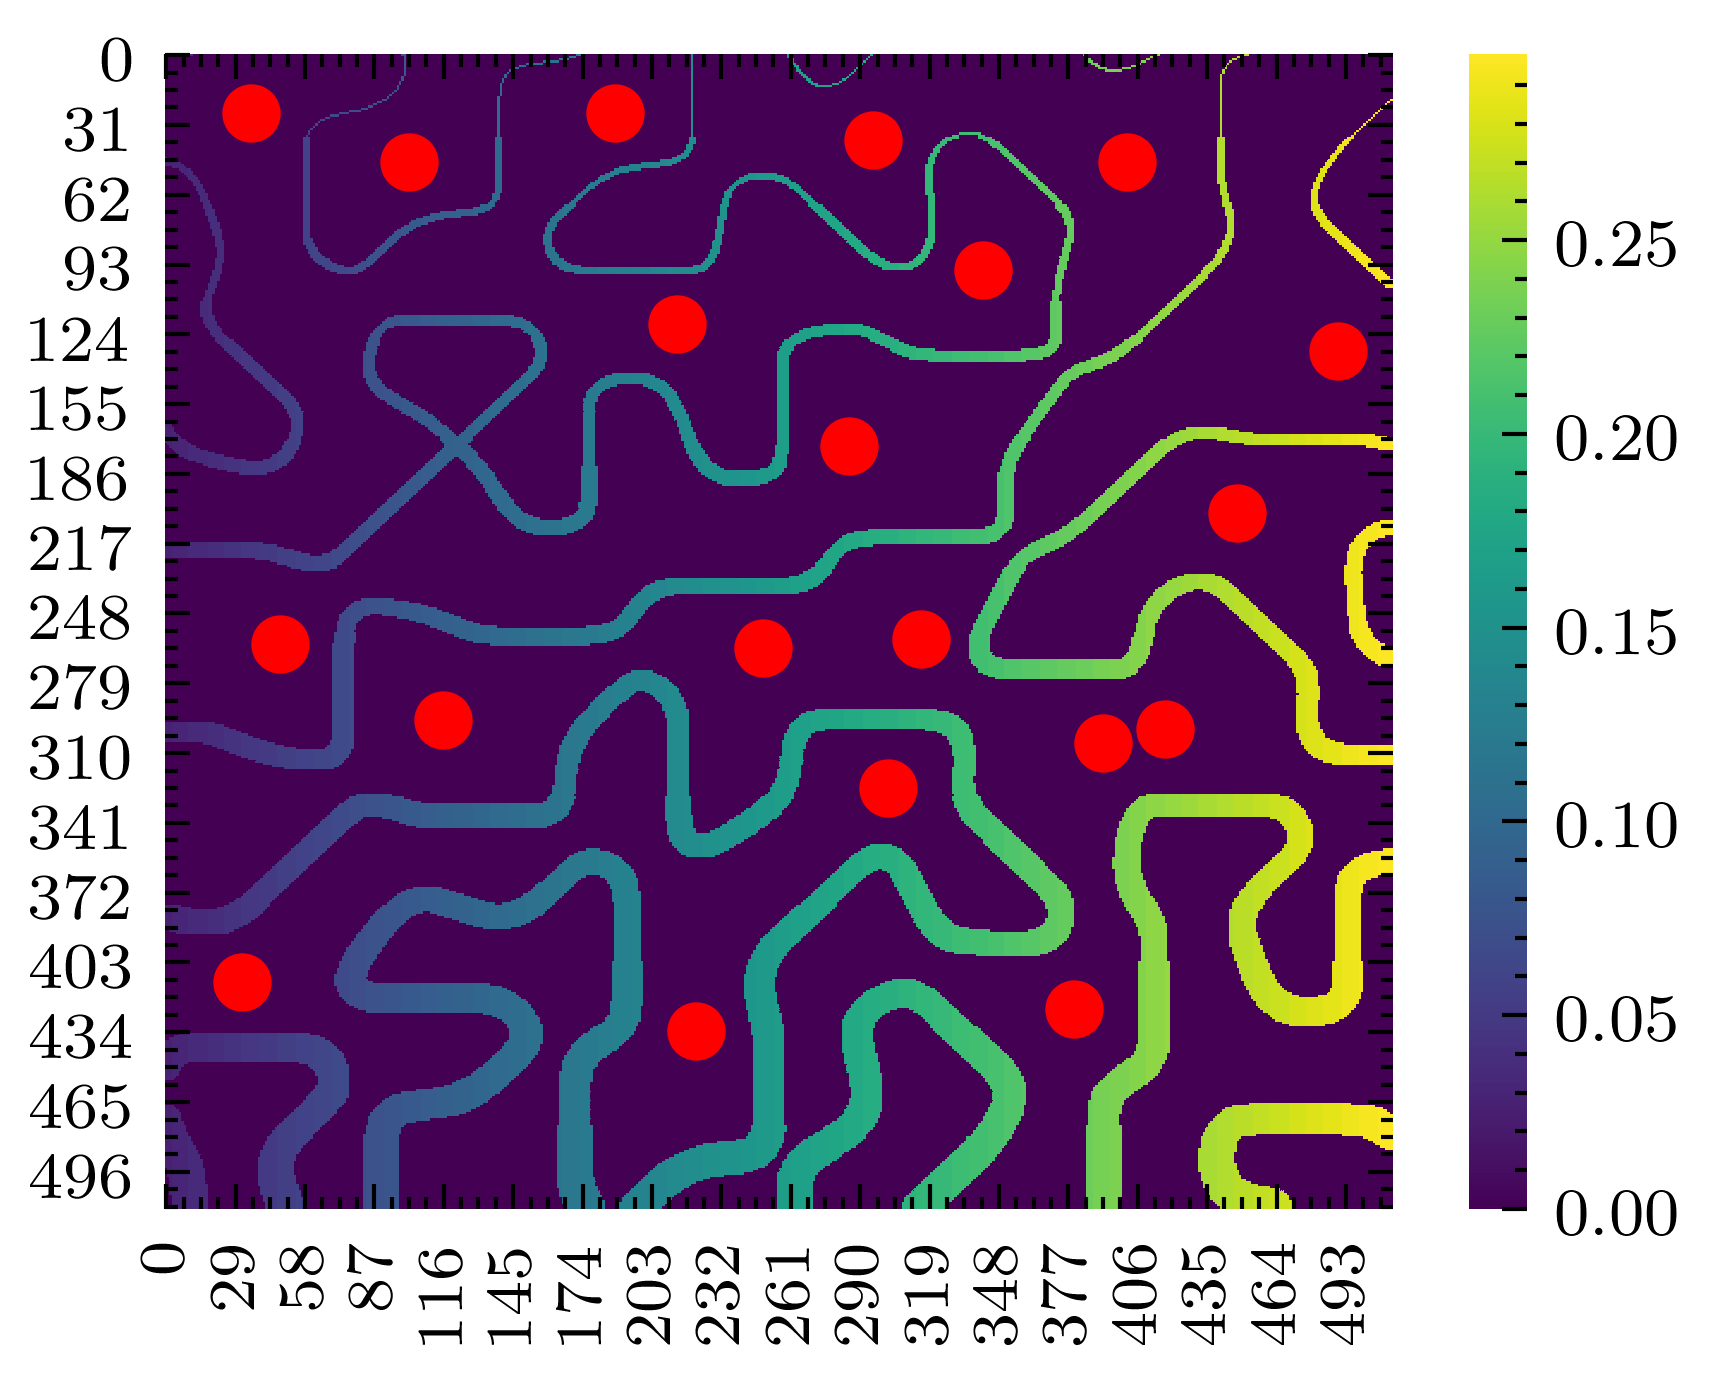

In [20]:
spawn_pos = spawn_strat.reduce_positions_by_clustering(flat_pos, 20)
fig = spawn_strat.show_spawn_pos(spawn_pos)
figsave(fig, out_dir + '/spawn-10.png')